## Find distinguishing properties of modalities

In [1]:
%load_ext autoreload
%autoreload 2

import modish
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set(style='ticks', context='talk', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline



import flotilla

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'

folder = '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/bayesian'

study = flotilla.embark('singlecell_pnm_figure2_modalities_bayesian', flotilla_dir=flotilla_dir)

not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:784: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/home/obotvinnik/workspace-git/flotilla/flotilla/__init__.py:55: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2016-01-13 08:05:26	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure2_modalities_bayesian/datapackage.json
2016-01-13 08:05:26	Parsing datapackage to create a Study object
2016-01-13 08:05:54	Initializing Study
2016-01-13 08:05:54	Initializing Predictor configuration manager for Study
2016-01-13 08:05:54	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-01-13 08:05:54	Added ExtraTreesClassifier to default predictors
2016-01-13 08:05:54	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-01-13 08:05:54	Added ExtraTreesRegressor to default predictors
2016-01-13 08:05:54	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-01-13 08:05:54	Added GradientBoostingClassifier to default predictors
2016-01-13 08:05:54	Predictor GradientBoostingRegressor is of type <class 'sklearn.

In [2]:
from flotilla.visualize.gene_ontology import plot_go_enrichment

In [3]:
figure_folder = '{}/gene_ontology'.format(folder)
! mkdir $figure_folder

mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/bayesian/gene_ontology': File exists


In [4]:
sns.set(context='paper', style='ticks')

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


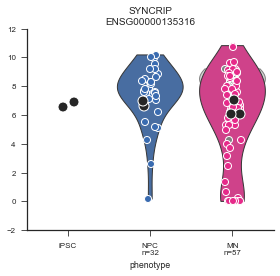

In [6]:
study.plot_gene('SYNCRIP')

In [10]:
figure_folder

'/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/bayesian/gene_ontology'

MN
	bimodal
NPC
	bimodal
iPSC
	bimodal
                              features_of_interest_in_go_term  \
GO:0006351  ENSG00000141076,ENSG00000005483,ENSG0000016067...   
GO:0006355  ENSG00000141076,ENSG00000171988,ENSG0000016067...   
GO:0006306  ENSG00000119772,ENSG00000005483,ENSG0000017802...   
GO:0045893  ENSG00000138293,ENSG00000162664,ENSG0000000548...   
GO:0008152  ENSG00000083807,ENSG00000072042,ENSG0000007221...   

                 features_of_interest_in_go_term_gene_symbols  \
GO:0006351  CIRH1A,KMT2E,CHTOP,EED,ZNF326,SOHLH2,RBM39,CRC...   
GO:0006355  CIRH1A,JMJD1C,CHTOP,CSDE1,MTERF,SOHLH2,RBM39,S...   
GO:0006306  DNMT3A,KMT2E,DMAP1,ATRX,DNMT3B,EHMT1,ATF7IP,GN...   
GO:0045893  NCOA4,ZNF326,KMT2E,CNBP,OTX2,RSF1,CHEK2,CHURC1...   
GO:0008152  SLC27A5,RDH11,ALDH3A2,ACLY,ECHDC1,AGPAT5,DPH5,...   

                     go_domain  \
GO:0006351  biological_process   
GO:0006355  biological_process   
GO:0006306  biological_process   
GO:0045893  biological_process   
GO:000815

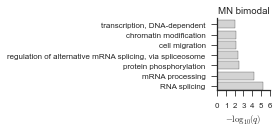

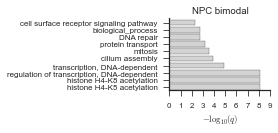

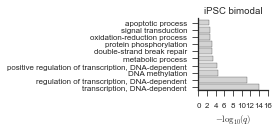

In [9]:
import itertools


for (phenotype), phenotype_df in study.supplemental.modalities_tidy.groupby(['phenotype']):
    print phenotype
    background = list(itertools.chain(*study.splicing.feature_data.ensembl_id[phenotype_df.event_name].str.split(',').values))
    for modality, modality_df in phenotype_df.groupby('modality'):
        if modality != 'bimodal':
            continue
        print '\t', modality
        modality_genes = list(itertools.chain(*study.splicing.feature_data.ensembl_id[modality_df.event_name].str.split(',').values))
        go = study.go_enrichment(modality_genes, background, p_value_cutoff=0.01, domain='biological_process')
        if go is None or go.empty:
            print '... empty GO enrichment!'
            continue
        if (phenotype == 'iPSC') & (modality == 'bimodal'):
            print go.head()
        go.to_csv('{}/modality_go_enrichment_within_celltype_{}_{}.csv'.format(figure_folder, modality, phenotype))
        fig, ax = plt.subplots(figsize=(4, 2))
        ax = plot_go_enrichment(data=go, color='lightgrey')
        ax.set_title('{} {}'.format(phenotype, modality))
        fig = plt.gcf()
        fig.tight_layout()
        fig.savefig('{}/modality_go_enrichment_within_celltype_{}_{}.pdf'.format(figure_folder, modality, phenotype))

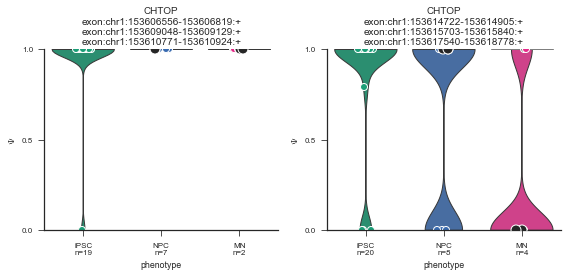

In [11]:
study.plot_event('CHTOP')

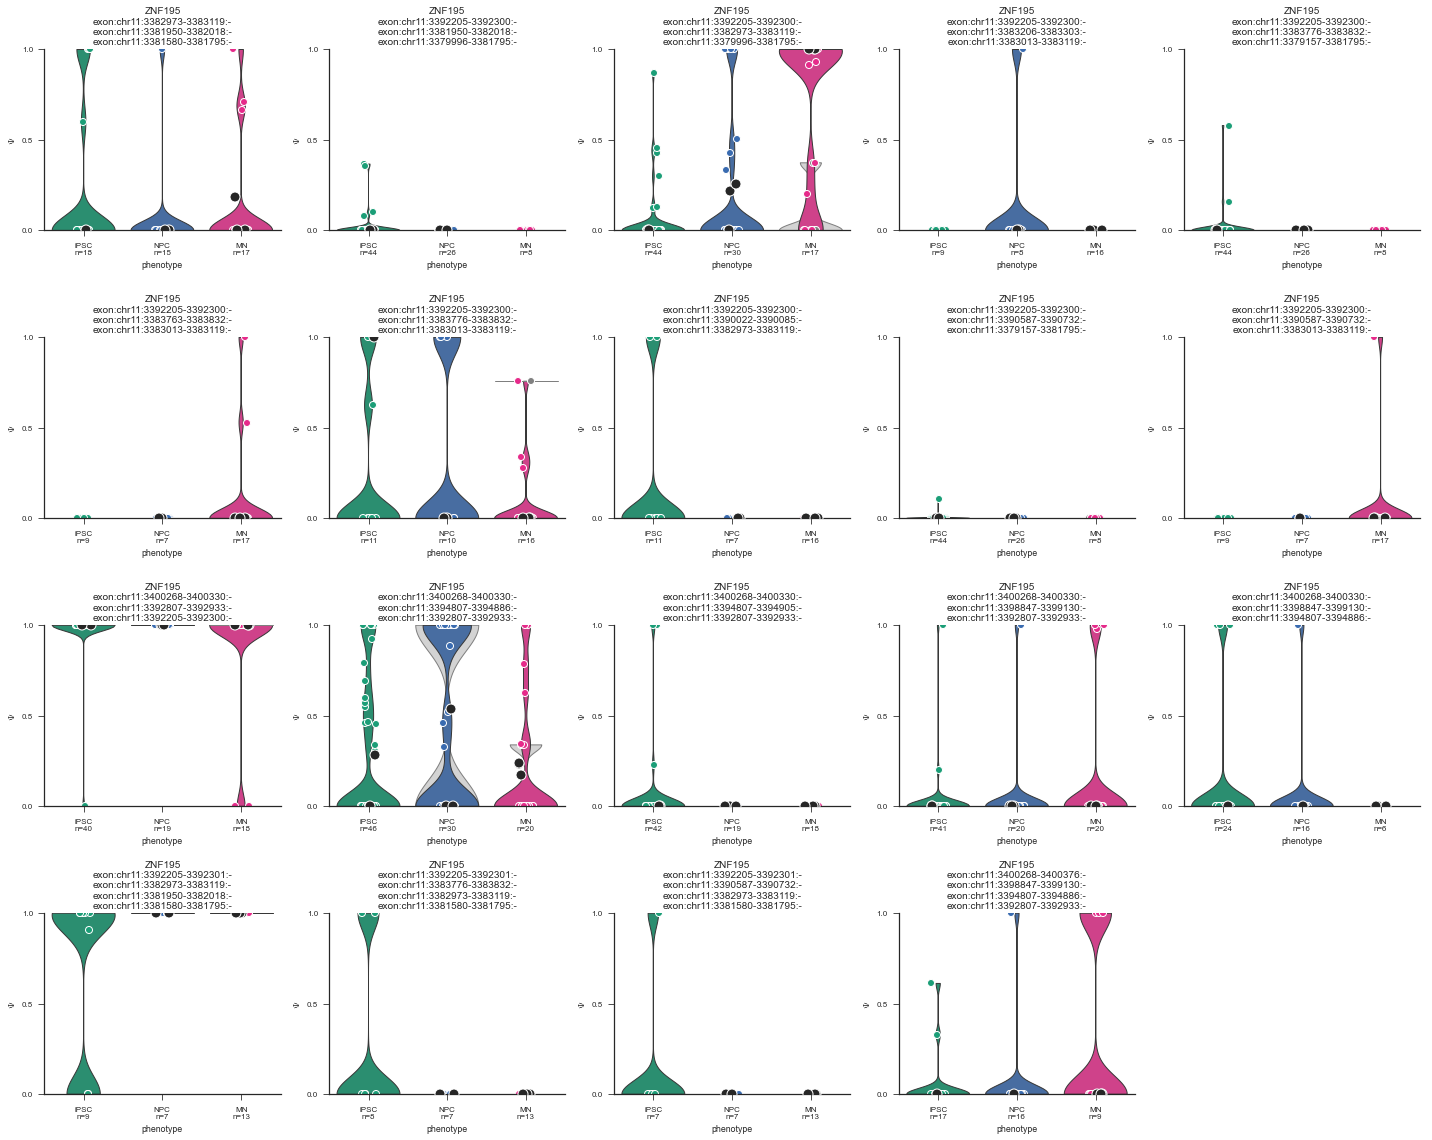

In [12]:
study.plot_event('ZNF195')

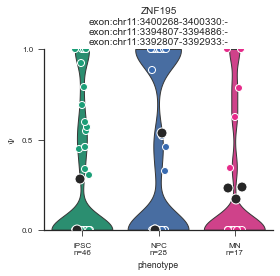

In [13]:
study.plot_event('exon:chr11:3400268-3400330:-@exon:chr11:3394807-3394886:-@exon:chr11:3392807-3392933:-', 
                 sample_subset='~outlier')
fig = plt.gcf()
fig.savefig('{}/znf195_splicing.pdf'.format(figure_folder))

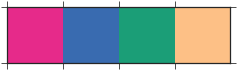

In [21]:
sns.palplot(pd.Series(study.metadata.phenotype_to_color))

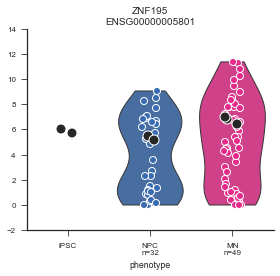

In [14]:
study.plot_gene('ZNF195',
                 sample_subset='~outlier')
fig = plt.gcf()
fig.savefig('{}/znf195_expression.pdf'.format(figure_folder))

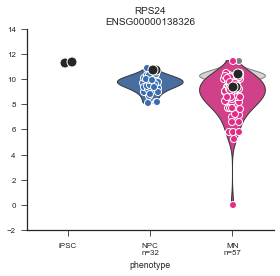

In [17]:
study.plot_gene("RPS24")

In [18]:
study.expression.data.shape

(96, 11641)

In [ ]:
modalities_all_celltypes = study.supplemental.modalities_tidy.groupby('event_name').filter(
    lambda x: len(x) == len(study.phenotype_order)

In [ ]:
import itertools

for (phenotype), phenotype_df in modalities_all_celltypes.groupby(['modality']):
    print phenotype
    background = list(itertools.chain(*study.splicing.feature_data.ensembl_id[phenotype_df.event_name].str.split(',').values))
    for modality, modality_df in phenotype_df.groupby('phenotype'):
        print '\t', modality
        modality_genes = list(itertools.chain(*study.splicing.feature_data.ensembl_id[modality_df.event_name].str.split(',').values))
        go = study.go_enrichment(modality_genes, background, p_value_cutoff=0.01, domain='biological_process')
        if go is None or go.empty:
            print '\t... empty GO enrichment!'
            continue
        ax = plot_go_enrichment(data=go, color='lightgrey')
        ax.set_title('{} {}'.format(phenotype, modality))
        fig = plt.gcf()
#         fig.tight_layout()
        fig.savefig('{}/modality_go_enrichment_across_celltypes_{}_{}.pdf'.format(figure_folder, modality, phenotype))

In [ ]:
import itertools

background = list(itertools.chain(*study.splicing.feature_data.ensembl_id[modalities_all_celltypes.event_name.unique()].str.split(',').values))


for (group), df1 in modalities_all_celltypes.groupby(['modality']):
    print group
    foreground = list(itertools.chain(*study.splicing.feature_data.ensembl_id[df1.event_name].str.split(',').values))
    go = study.go_enrichment(foreground, background, p_value_cutoff=0.1, domain='biological_process')
    if go is None or go.empty:
        print '\t... empty GO enrichment!'
        continue

    ax = plot_go_enrichment(data=go, color='lightgrey')
    ax.set_title(group)
    fig = plt.gcf()
    fig.tight_layout()
    fig.savefig('{}/modality_go_enrichment_across_celltypes_{}.pdf'.format(figure_folder, group))